# Diabetes Prediction - Classification

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Data Loading

In [2]:
df = pd.read_csv("data\weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


### Missing Value

In [5]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### Outliers

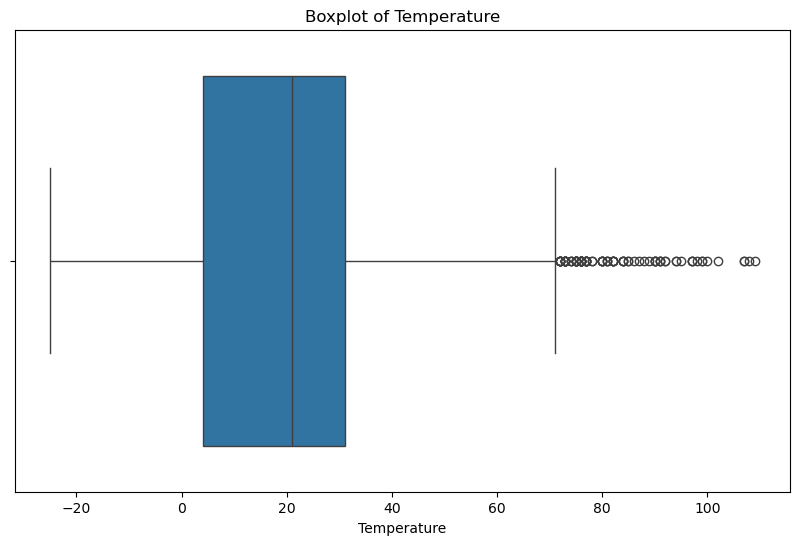

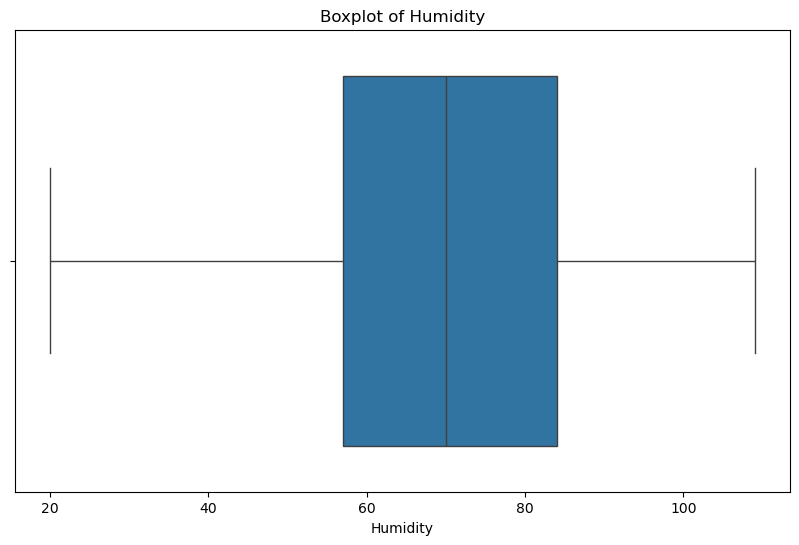

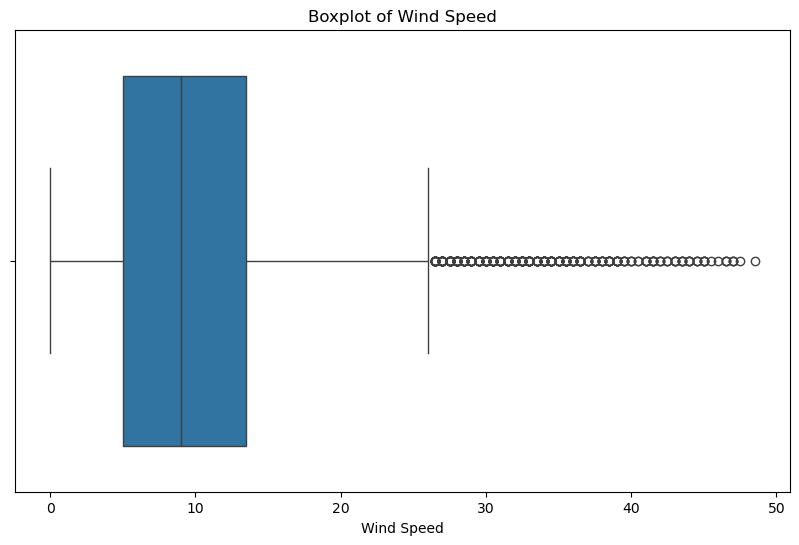

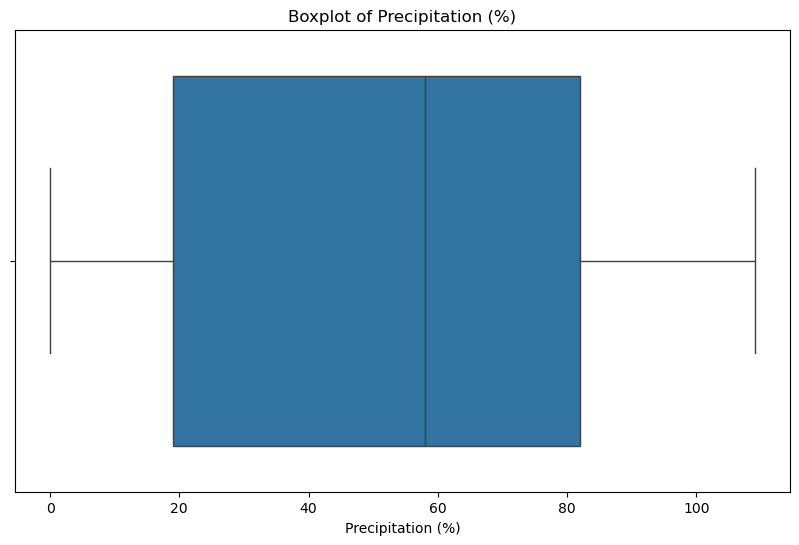

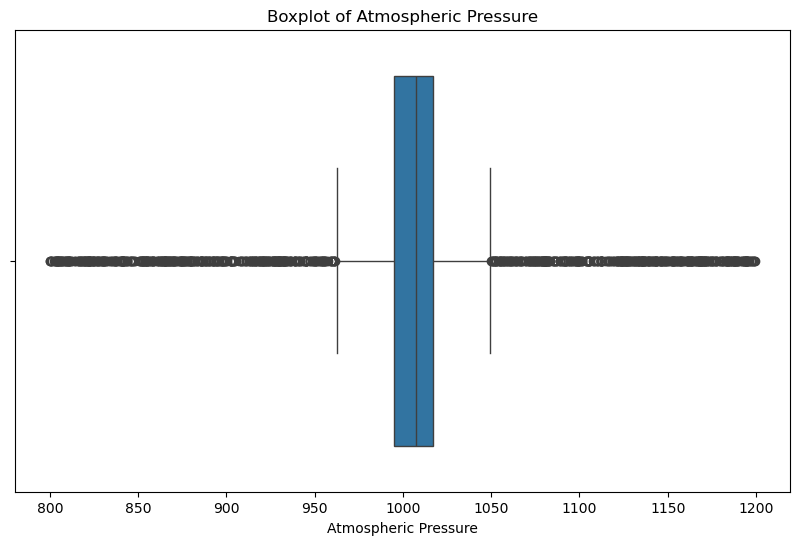

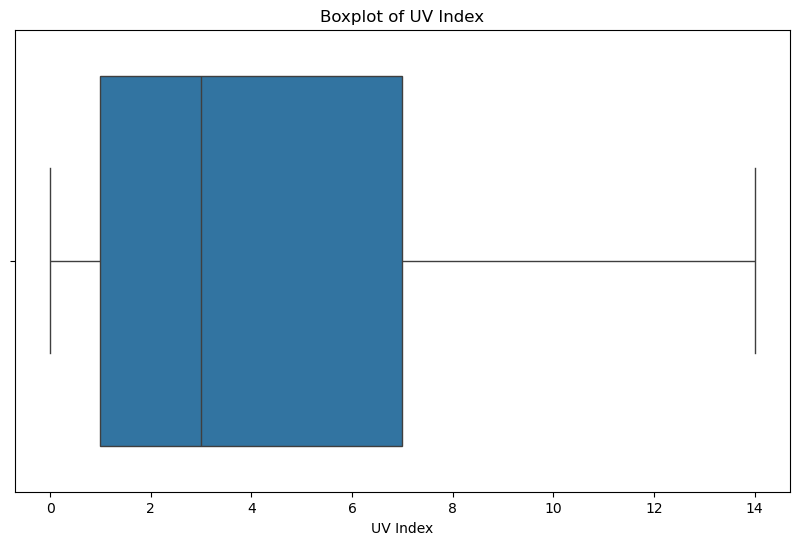

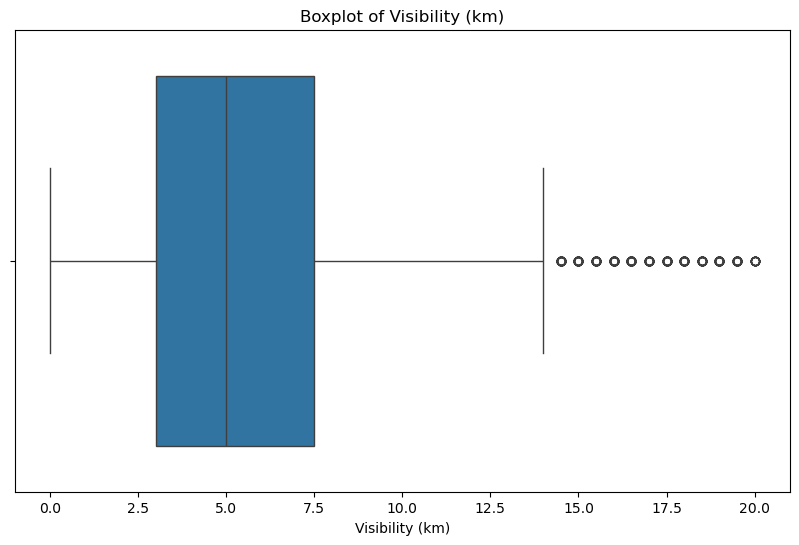

In [6]:
# Cek Boxplot untuk Numerical Columns
numeric_cols  = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_cols :
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [7]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(11689, 11)

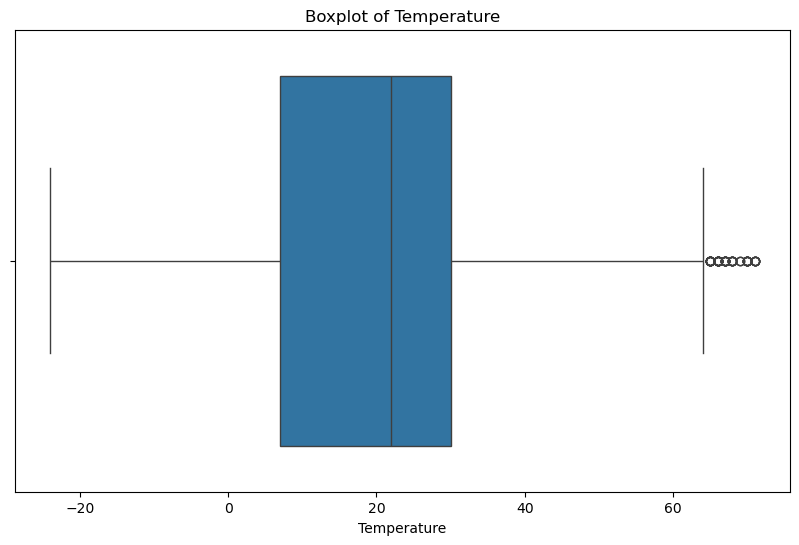

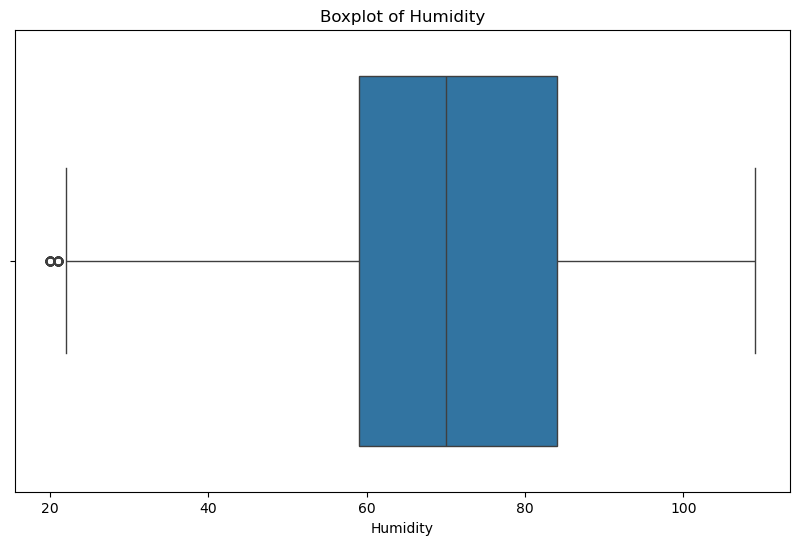

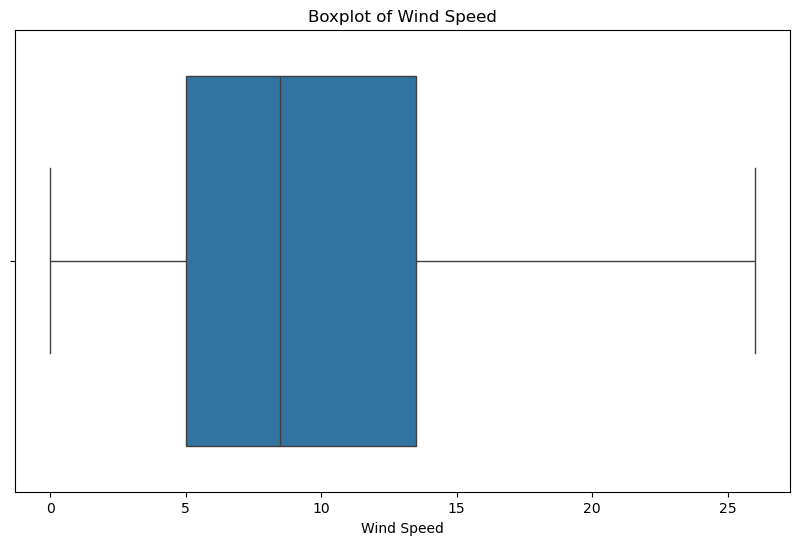

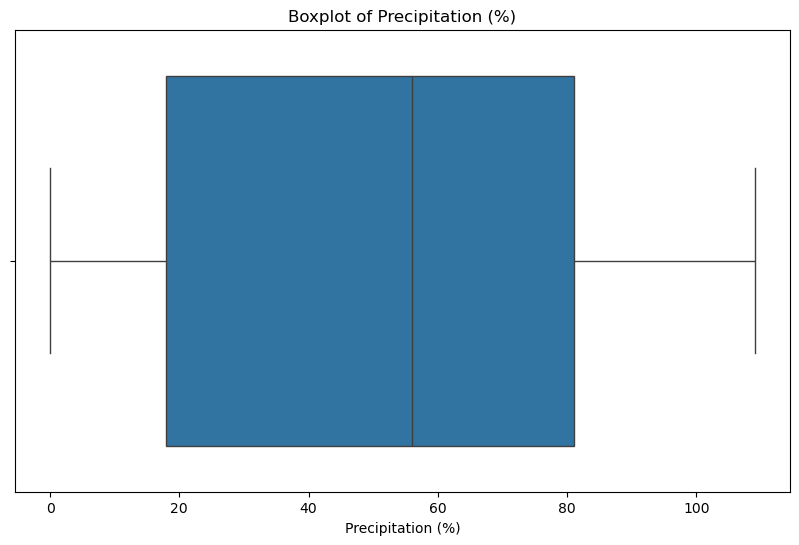

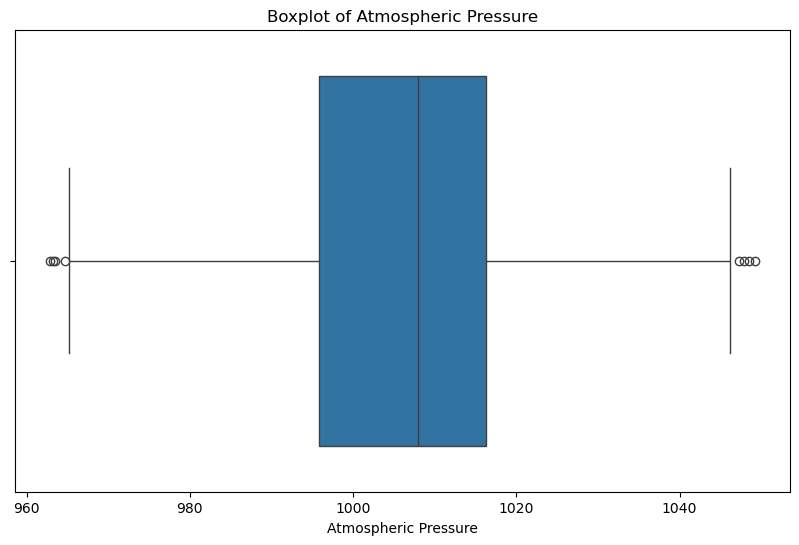

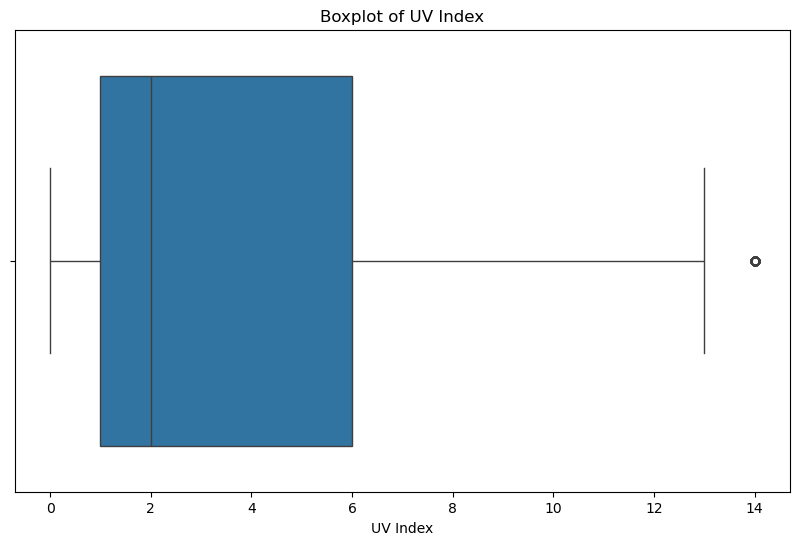

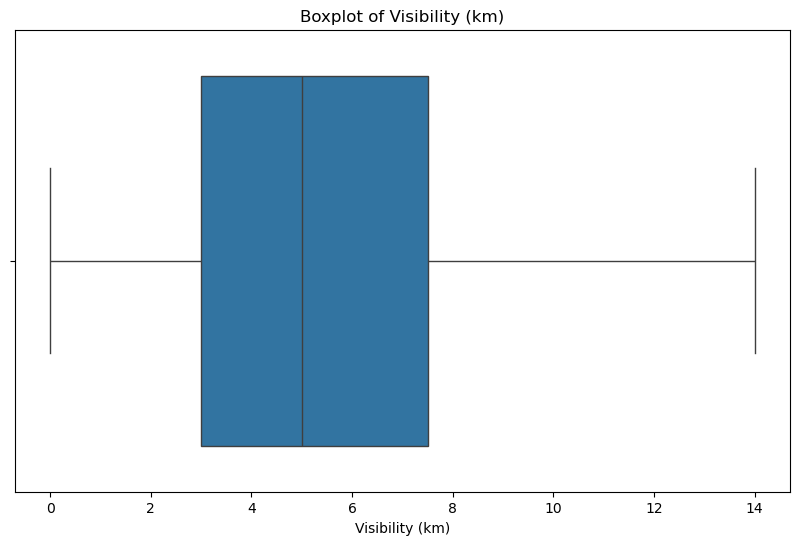

In [8]:
# Cek Boxplot setelah penanganan outlier
for feature in numeric_cols :
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

### Univariate Analysis

In [9]:
numeric_cols  = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols  = df.select_dtypes(include=['object']).columns

#### Kolom Categorical

               jumlah sampel  persentase
Cloud Cover                             
overcast                5476        46.8
partly cloudy           4072        34.8
clear                   2084        17.8
cloudy                    57         0.5


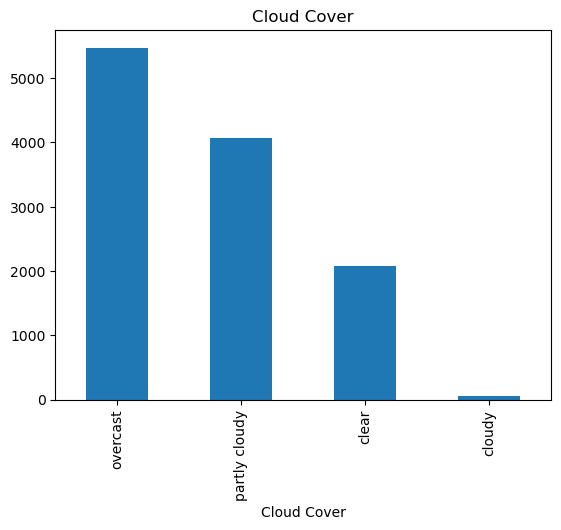

        jumlah sampel  persentase
Season                           
Winter           5116        43.8
Spring           2238        19.1
Summer           2180        18.7
Autumn           2155        18.4


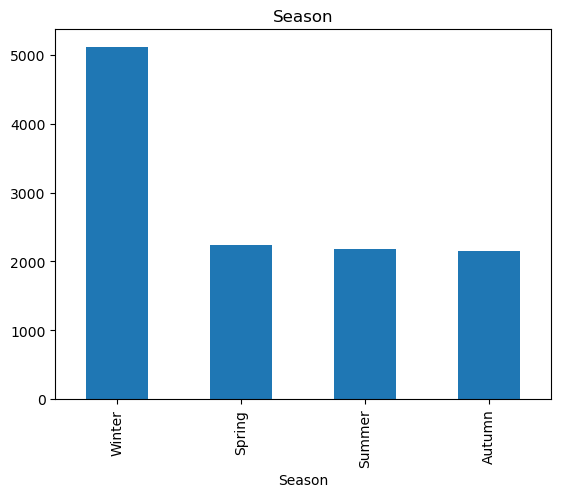

          jumlah sampel  persentase
Location                           
inland             4301        36.8
mountain           4297        36.8
coastal            3091        26.4


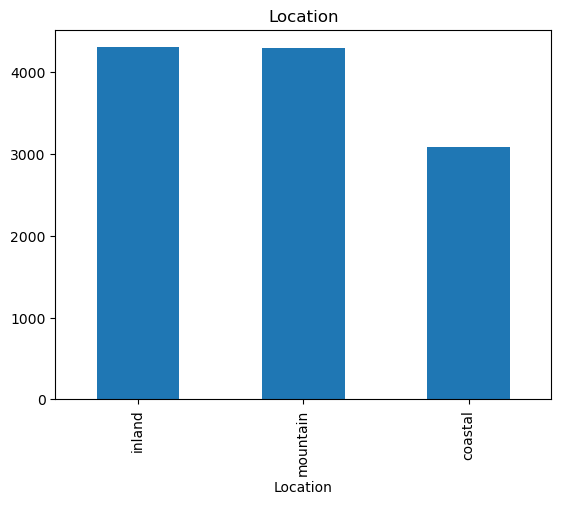

              jumlah sampel  persentase
Weather Type                           
Cloudy                 2994        25.6
Sunny                  2965        25.4
Snowy                  2902        24.8
Rainy                  2828        24.2


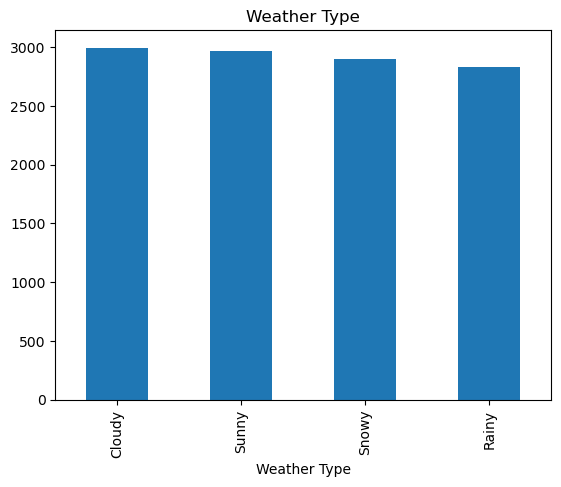

In [10]:
for feature in categorical_cols:
    count = df[feature].value_counts()
    percent = 100*df[feature].value_counts(normalize=True)
    summary_df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(summary_df)

    count.plot(kind='bar', title=feature)
    plt.title(feature)
    plt.show()

#### Kolom Numerical

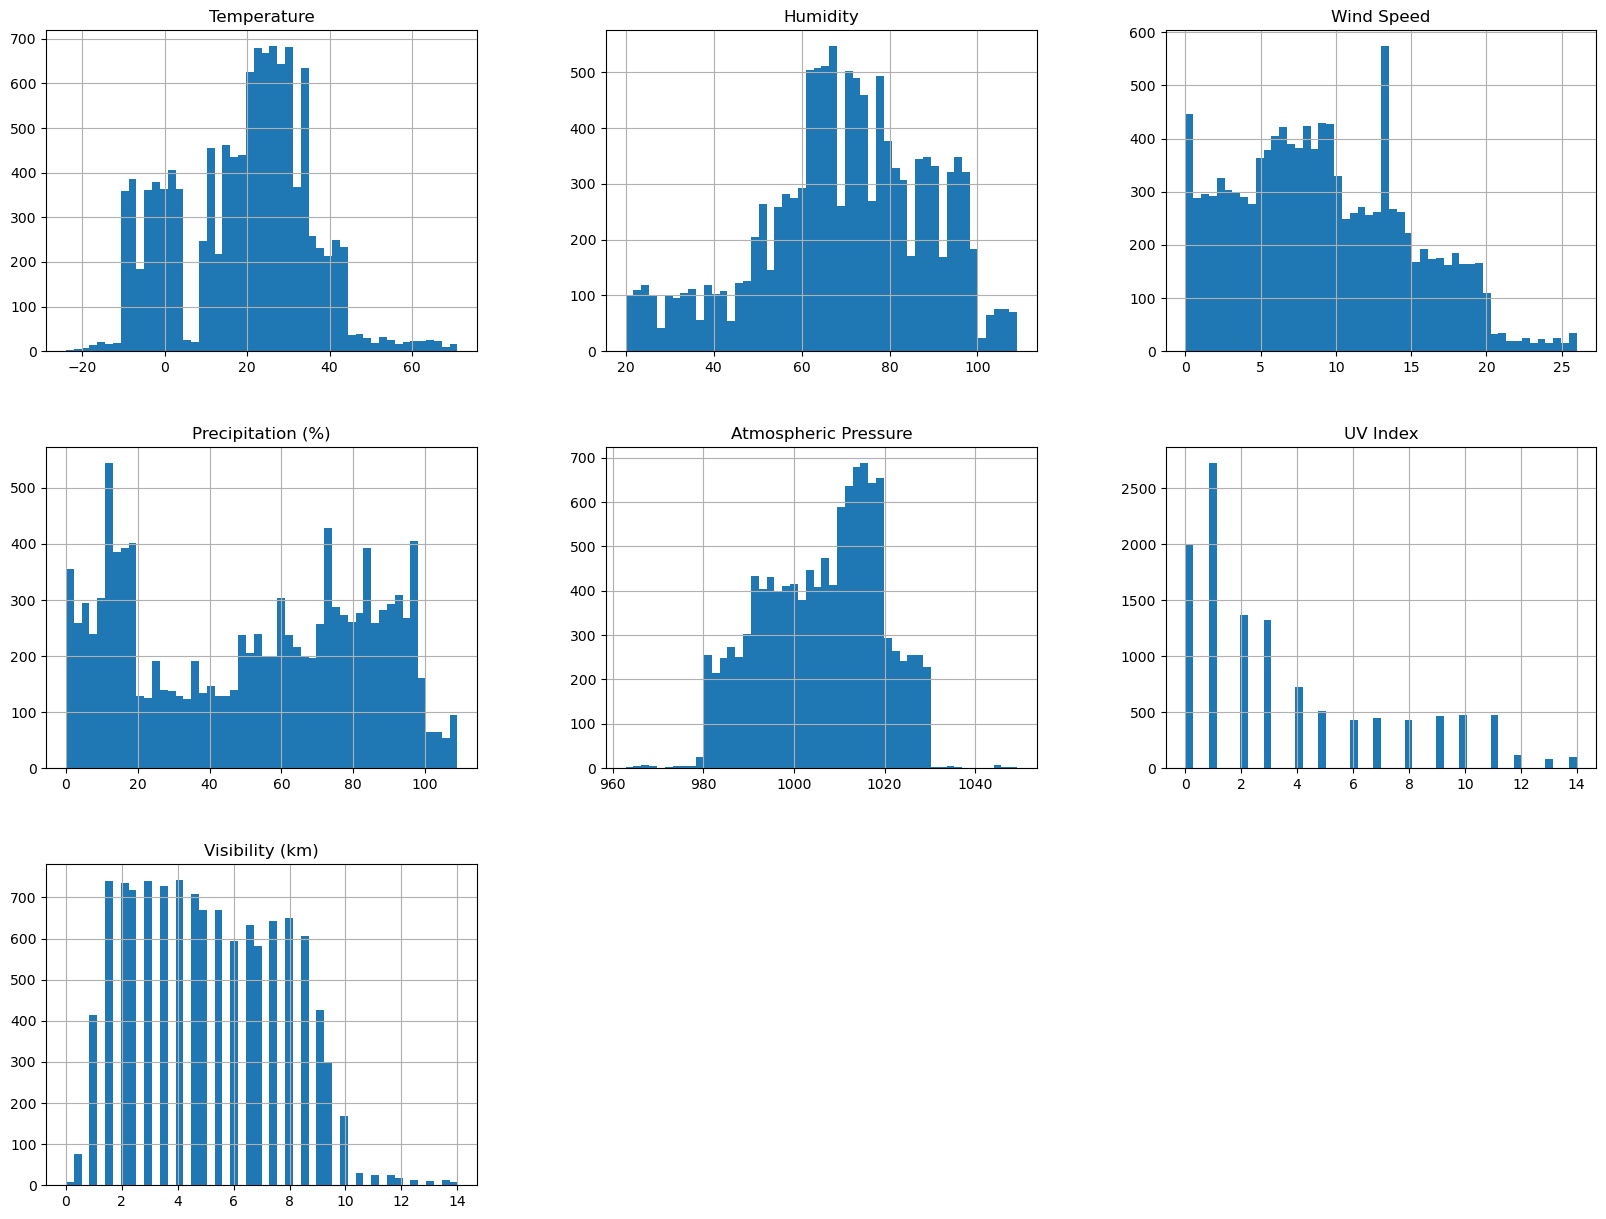

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

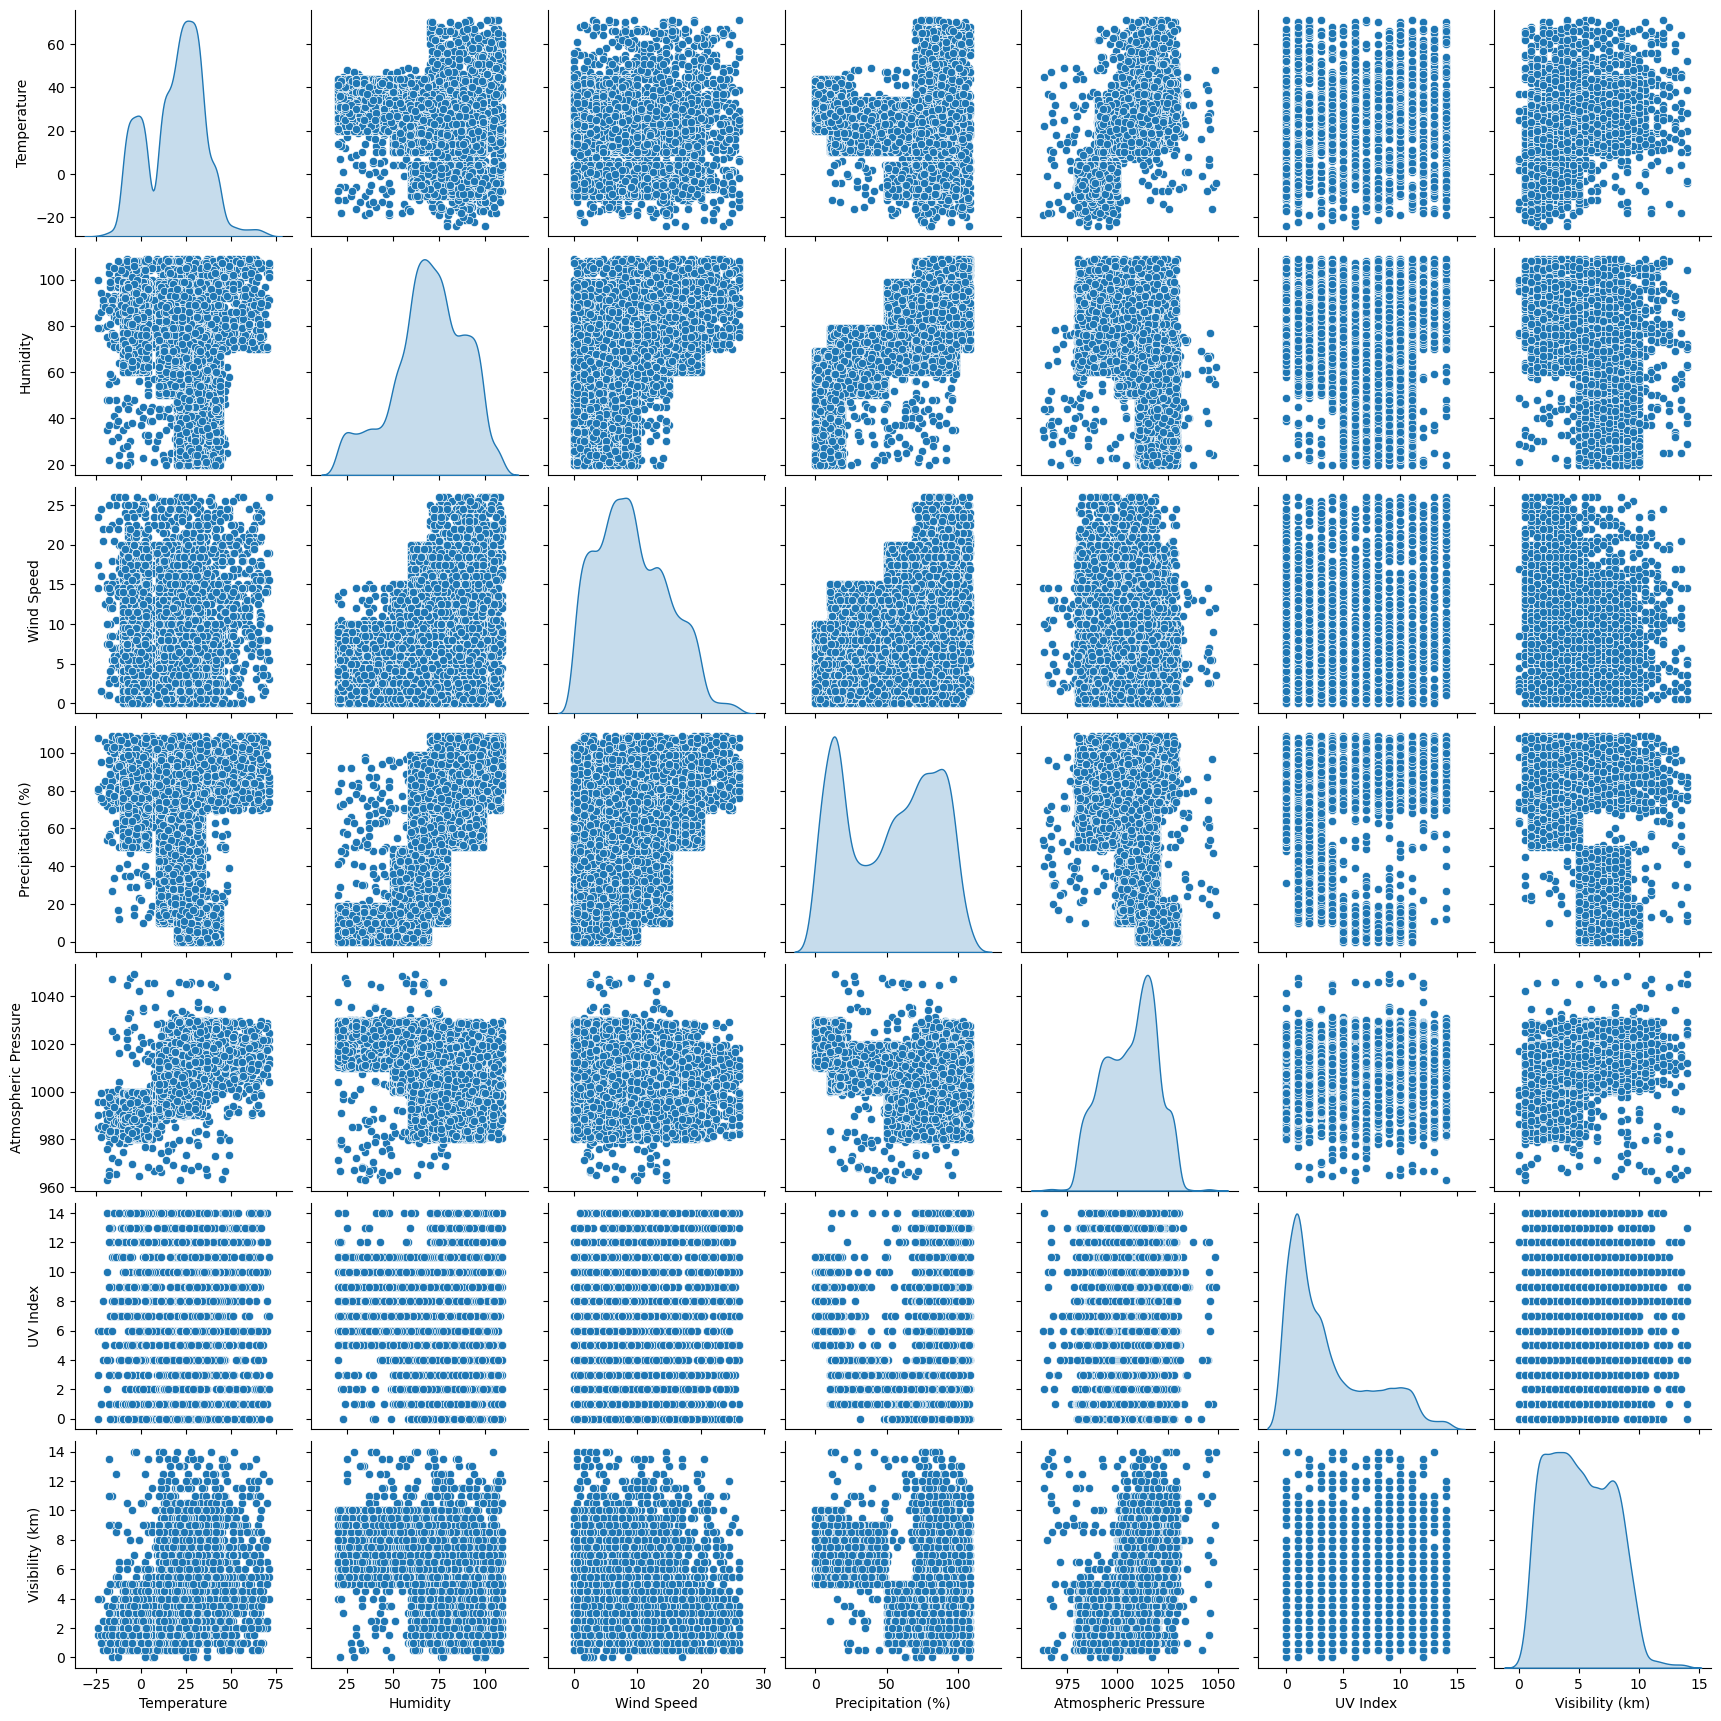

In [12]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')
plt.show()

## Data Preparation

### Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Menyimpan encoder per kolom

for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


C:\Users\ACER\AppData\Local\Temp\ipykernel_5132\3898604361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\ACER\AppData\Local\Temp\ipykernel_5132\3898604361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\ACER\AppData\Local\Temp\ipykernel_5132\3898604361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [14]:
for column, le in label_encoders.items():
    print(f'\nMapping untuk kolom: {column}')
    for i, class_ in enumerate(le.classes_):
        print(f'  {i}: {class_}')


Mapping untuk kolom: Cloud Cover
  0: clear
  1: cloudy
  2: overcast
  3: partly cloudy

Mapping untuk kolom: Season
  0: Autumn
  1: Spring
  2: Summer
  3: Winter

Mapping untuk kolom: Location
  0: coastal
  1: inland
  2: mountain

Mapping untuk kolom: Weather Type
  0: Cloudy
  1: Rainy
  2: Snowy
  3: Sunny


In [15]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13194,29.0,62,13.0,17.0,2,1002.81,2,1,5.0,0,0
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,1
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,2


### Feature Selection

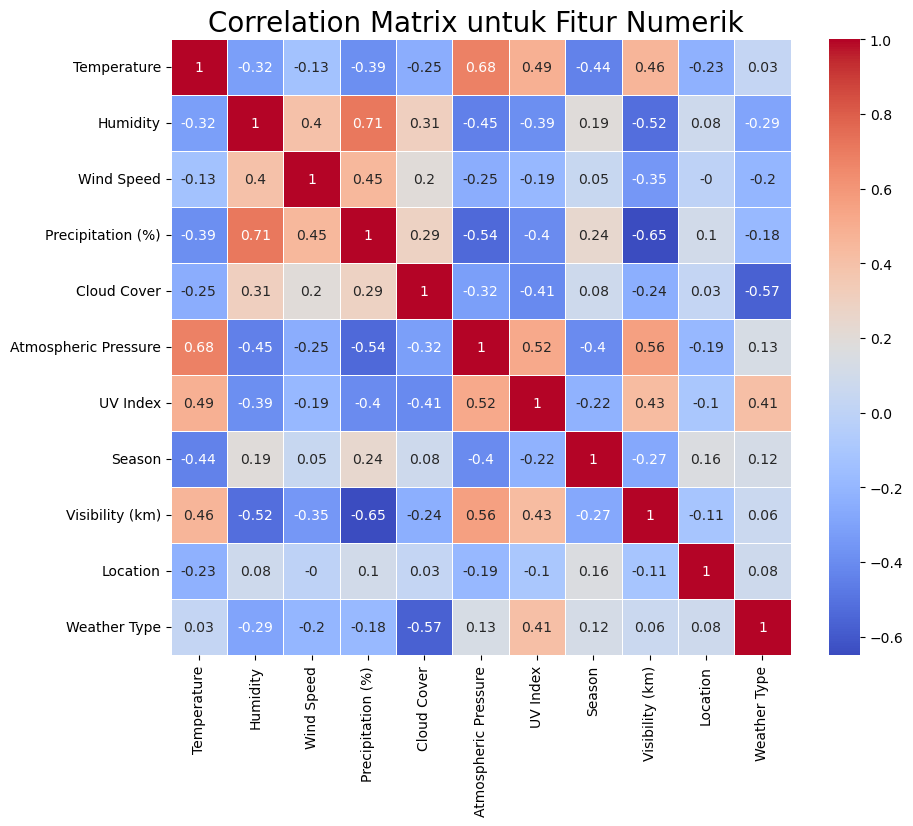

In [16]:
# Cek Correlation Matrix setelah Encoding
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

In [17]:
# drop kolom yang tidak berkolerasi dengan fitur target CLASS
df.drop(['Temperature', 'Visibility (km)', 'Location'], inplace=True, axis=1)
df

C:\Users\ACER\AppData\Local\Temp\ipykernel_5132\319562735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Temperature', 'Visibility (km)', 'Location'], inplace=True, axis=1)


,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Weather Type
0,73,9.5,82.0,3,1010.82,2,3,1
1,96,8.5,71.0,3,1011.43,7,1,0
2,64,7.0,16.0,0,1018.72,5,1,3
3,83,1.5,82.0,0,1026.25,7,1,3
4,74,17.0,66.0,2,990.67,1,3,1
...,...,...,...,...,...,...,...,...
13194,62,13.0,17.0,2,1002.81,2,1,0
13195,74,14.5,71.0,2,1003.15,1,2,1
13197,77,5.5,28.0,2,1012.69,3,0,0
13198,76,10.0,94.0,2,984.27,0,3,2


### Data Splitting

In [18]:
X = df.drop(["Weather Type"],axis =1)
y = df["Weather Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
print(f'Total data in whole dataset: {len(X)}')
print(f'Total data in train dataset: {len(X_train)}')
print(f'Total data in test dataset: {len(X_test)}')

Total data in whole dataset: 11689
Total data in train dataset: 9351
Total data in test dataset: 2338


## Modeling

### K-Nearest Neighbors

In [20]:
knn = KNeighborsClassifier(
    n_neighbors=3,
    weights='uniform',
    metric='minkowski'
)
knn.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


### Decision Tree

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


### Random Forest

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


### AdaBoost

In [23]:
adb = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adb.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


### Naive Bayes

In [24]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


## Evaluation

### Accuracy, Precision, Recall, F1-Score

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    num_classes = len(np.unique(y_test))

    if num_classes == 2:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = None, None, None, None

    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),

        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

In [26]:
results = {
    'KNN': evaluate_model(knn, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'AdaBoost': evaluate_model(adb, X_test, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test)
}

In [27]:
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.866980,0.865265,0.864260,0.864187
1,Decision Tree,0.937553,0.936929,0.936773,0.936830
2,Random Forest,0.953807,0.953813,0.952932,0.953095
3,AdaBoost,0.907613,0.907317,0.905832,0.905913
4,Naive Bayes,0.910180,0.909661,0.909929,0.908725


### Confusion Matrix

In [28]:
# Plot confusion matrix
def plot_confusion_matrix(cm, class_labels, title='Confusion Matrix'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

cm_knn = results['KNN']['Confusion Matrix']
cm_dt = results['Decision Tree']['Confusion Matrix']
cm_rf = results['Random Forest']['Confusion Matrix']
cm_abd = results['AdaBoost']['Confusion Matrix']
cm_nb = results['Naive Bayes']['Confusion Matrix']
class_labels = dt.classes_

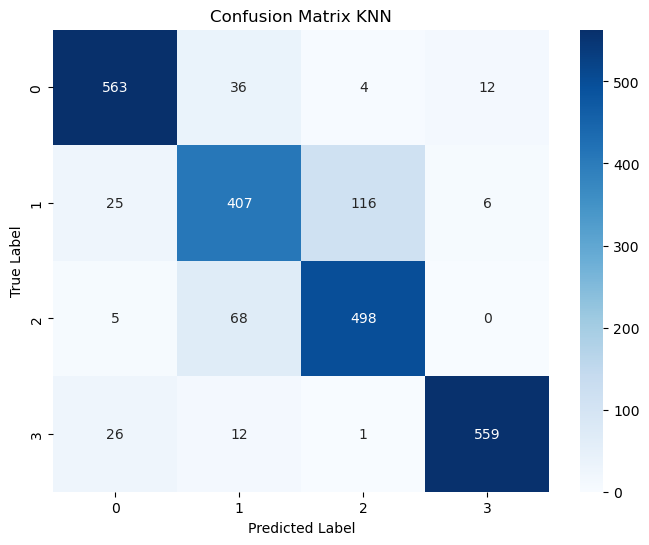

In [29]:
plot_confusion_matrix(cm_knn, class_labels, title='Confusion Matrix KNN')

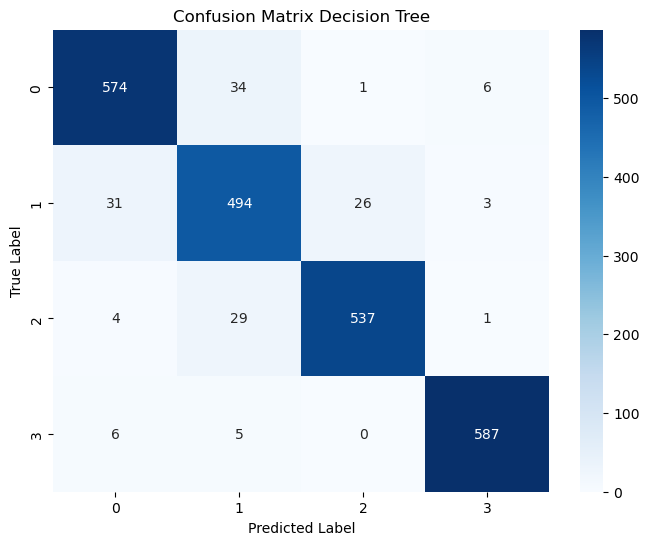

In [30]:
plot_confusion_matrix(cm_dt, class_labels, title='Confusion Matrix Decision Tree')

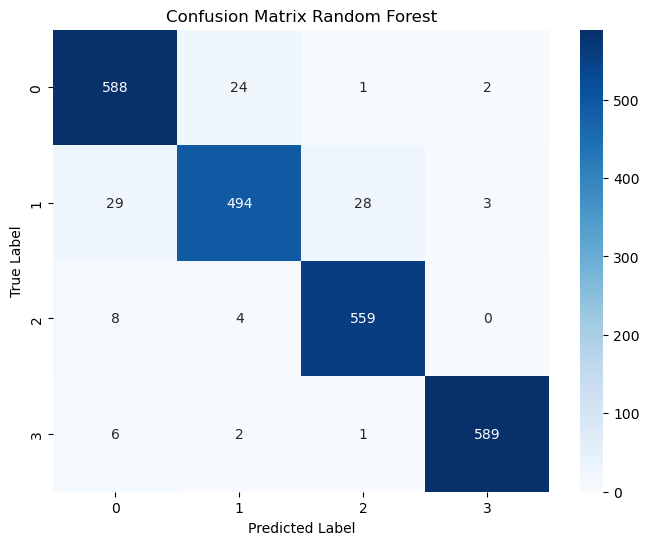

In [31]:
plot_confusion_matrix(cm_rf, class_labels, title='Confusion Matrix Random Forest')

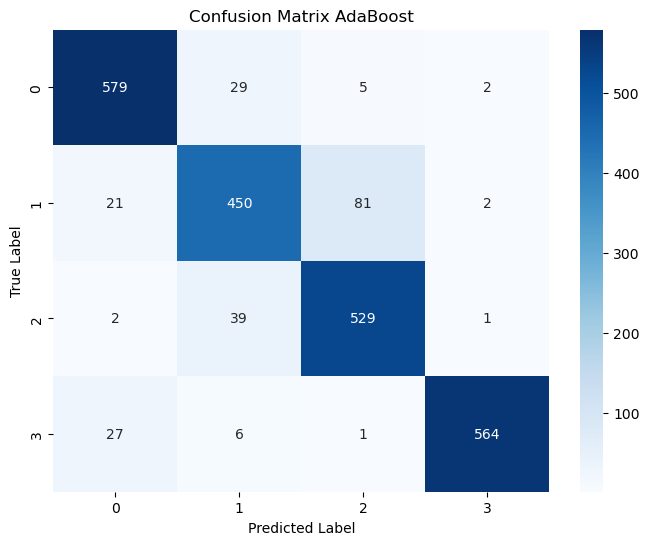

In [32]:
plot_confusion_matrix(cm_abd, class_labels, title='Confusion Matrix AdaBoost')

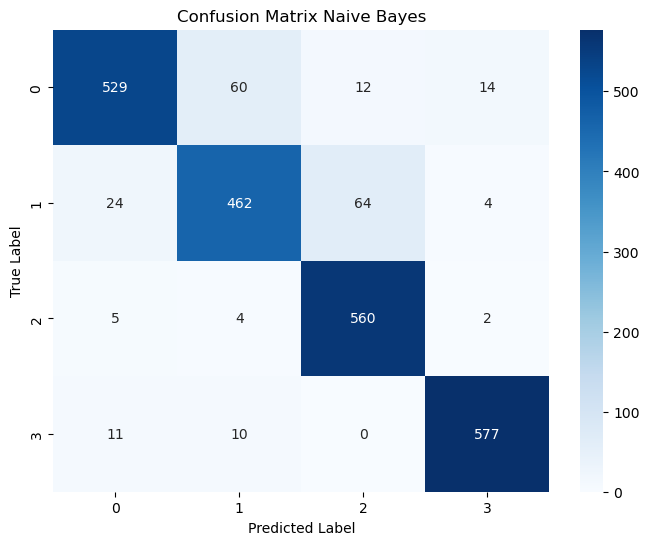

In [33]:
plot_confusion_matrix(cm_nb, class_labels, title='Confusion Matrix Naive Bayes')

## Save

In [ ]:
# simpan data test
X_test.to_csv('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False) 

In [35]:
# simpan model
import joblib

model_dict = {'KNN': knn,
              'Decision Tree': dt,
              'Random Forest': rf,
              'AdaBoost': adb,
              'Naive Bayes': nb,
              }
joblib.dump(model_dict, 'model_dict.pkl')

['model_dict.pkl']